### Decision tree

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
 الگوریتم ساخت درخت تصمیم به صورت زیر میباشد:
<ol>
<li>
یک ویژگی انتخاب می شود و داده‌ها بر اساس یک شرط روی آن ویژگی تقسیم می‌شوند. بهترین ویژگی، ویژگی‌ای است که داده‌ها را به بهترین شکل تقسیم می‌کند.
</font></div>

<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<b><i>
 ID3 الگوریتم
</i></b>
</font></div>
<p></p>
<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در ادامه‌ی این نوشته به بررسی الگوریتم ID3 که یک الگوریتم پایه‌ای برای ساخت درخت تصمیم است می‌پردازیم.
<h3>بهره‌ی اطلاعاتی</h3>
 برای تعیین رسیدن به برگ‌های درخت نیاز به بررسی این موضوع داریم که آیا داده‌های یک گره به‌اندازه‌ی کافی یکدست شده‌اند یا خیر. در الگوریتم ID3 برای این کار از معیار بهره‌ی اطلاعاتی استفاده می‌شود.
برای تعریف بهره‌ی اطلاعاتی ابتدا انتروپی را تعریف می‌کنیم.
<br>
انتروپی یک معیار عددی برای اندازه‌گیری اطلاعات یا تصادفی بودن یک متغیر تصادفی است. این معیار به صورت زیر تعریف می‌شود:
</font></div>

$H(X) := -\sum_{x \in \mathcal{x}} P(x)\; logP(x) = \mathbb{E}[-logP(x)]$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در مسئله‌ی دسته‌بندی دو کلاسه می‌توانیم احتمال انتساب داده به هر کلاس را با توزیع برنولی مدل کنیم. در این صورت خواهیم داشت:
</font></div>

$H(x):= -P_+\; logP_+ - P_-\; logP_-$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
نمودار زیر این تابع را بر حسب احتمال انتساب به ‌دسته‌ی مثبت نشان می‌دهد.
</font></div>

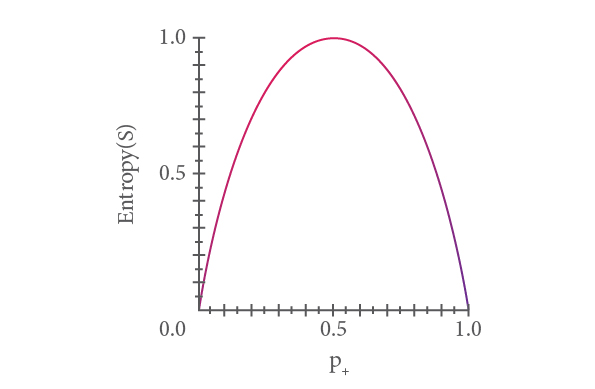

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
هر چه مقدار انتروپی بیشتر باشد ابهام درباره‌ی متغیر تصادفی بیشتر است. در مثال  بالا بیشینه‌ی انتروپی بازای مقدار احتمال ۰.۵ (مثلا یک سکه‌ی متوازن) رخ می‌دهد. هر چقدر به احتمال‌های ۰ یا ۱ نزدیک شویم (سکه نامتوازن‌تر شود) مقدار ابهام کم می‌شود.
<br>
بنابراین طبق آن‌چه گفته شد انتروپی به طور شهودی ابهام موجود در توزیع داده‌ها را به ما نشان‌ می‌دهد. از طرف دیگر اشاره شد که هنگام ساختن گره‌ها باید ویژگی‌ای انتخاب شود که دسته‌بندی داده‌ها براساس آن بیشترین یکدستی را در دسته‌های تولید شده، ایجاد کند. بنابراین یک معیار می‌تواند این باشد که این دسته‌بندی چقدر از انتروپی موجود در داده‌ها کاسته است. به این مقدار بهره‌ی اطلاعاتی گفته می‌شود.
</font></div>

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Entropy(S_v)$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
که در رابطه‌ی بالا S
مجموعه‌ی داده‌ها در گره قبل از تقسیم‌بندی است، A
ویژگی‌ای است که بر اساس آن داده‌ها تقسیم‌بندی می‌شوند.  Values(A)
مقادیر مختلفی است که ویژگی A
می‌تواند داشته باشد و
$S_v$
زیرمجموعه‌ای از S است که ویژگی A در آنها برابر با $v$ است.
<br>

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=6>
ابتدا کتابخانه های مورد نیاز را اد می کنیم. جهت کاهش بعد از کتابخانه آماده سایکیت استفاده می شود.
<br>

<div dir="rtl" style="text-align: justify"><font face="Titr" size=5>
نکته : در بالای هر باکس توضیح مربوط به کد نوشته شده آورده می شود.
<br>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.decomposition import PCA


حال در زیر توابع لازم از جمله آنتروپی و بهره اطلاعاتی را تکمیل کنید.
از این توابع در تعریف کردن مدل یادگیری و انتخاب بهترین ویژگی استفاده خواهیم کرد.

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
جهت محاسبه آنترپی با توجه به فرمول مربوطه احتمالات محاسبه شده و هر بار مقدار آنتروپی محاسبه می شود. چون ورودی تابع یک سری است. آنتروپی کل مجموع آنتروپی ها خواهد بود.
برای محاسبه گین اطلاعات هم با استفاده از تعریف فوق ،  برای هر مقدار خاص منحصر به فرد در بردار ویژگی ها لیبل های مربوطه بدست آمده و با توجه به آن مقدار ضریب وزنی و آنتروپی محاسبه می شود. در نهایت با انجام تفریق این مقدار از آنتروپی کل لیبل نود اصلی ، گین اطلاعات آن به ازای یک ویژگی بدست می آید.
جهت محاسبه گین اطلاعات کل ویژگی ها به ازای لیبل های موردنظر ، هر بار به ازای هر ستون از بردار ویژگی ها گین اطلاعات بدست آمده و مقدار مربوطه به صورت یک دیکشنری ذخیره می شود.
<br>

In [2]:
# (10 Points)
def entropy(y : pd.Series):
  ENTP = 0
  N = sum(y.value_counts())
  py = y.value_counts()/N
  ENTP += -py*np.log2(py)

  return sum(ENTP)
def information_gain(x: pd.Series, y: pd.Series):
    sample_entropy = 0
    total_entropy = entropy(y)
    for v in x.unique():
      label = y[x==v]
      label_cnt = y[x==v].value_counts()
      weight = sum(label_cnt)/len(y)
      sample_entropy = sample_entropy + weight*entropy(label)

    info_gain = total_entropy - sample_entropy
    #return the information gain of x
    return info_gain
def information_gains(X: pd.DataFrame, y: pd.Series):
    information_gains_all = {}

    for column in X.columns:
        information_gains_all[column] = information_gain(X[column], y)

    return information_gains_all


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
با توجه به دیتاست استفاده شده در این تمرین که حاوی مقادیر عددی پیوسته هستند، در پروسه ساخت درخت تصمیم دو راه حل قابل استفاده می باشد :
1) دیسکریت کردن و 2 حالته کردن تمام ویژگی ها با استفاده از تقسیم کل دیتای مربوط به هر ویژگی به n قسمت  (در واقع به جای ترشولد بندی کردن حین ساخت درخت تصمیم در ابتدای کار هر ویژگی به n ویژگی دو حالته تبدیل شده و از مکانیزم درخت تصمیم دیسکریت استفاده می شود.
روش بعدی در باکس اصلی پیاده سازی درخت تصمیم ارائه می شود.
<br>

In [ ]:

def multifeaturize (x_train) :
  results = {}
  for feature in x_train.columns :
    Thresholds = {}
    cnt = 1
    if len(x_train[feature].unique()) > 2 : # Detection features with dimore than 2 states
      Thresholds[feature] = np.linspace(np.amin(x_train[feature].values) , np.amax(x_train[feature].values) , 5) # 5 can be increased or decreased n = 5
      for val in  Thresholds[feature][1:-1]:
        h = np.zeros_like(x_train[feature].values)
        h[x_train[feature]>val] = 1
        results[feature + str(cnt)] = h
        cnt = cnt + 1
      del Thresholds
  return pd.DataFrame(results) # returning rsult as DataFrame format

<div dir=rtl>
حال در زیر کلاس Node  را تعریف میکنیم که  بیس اصلی مدل ما را تشکیل میدهد .

با استفاده از توابعی که در قسمت قبل نوشتید مدل یادگیری خود را کامل کنید.

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
روش دوم : <br> 2) در این روش ترشولد بندی کردن و ایجاد ساختار دو حالته right  و left در خود کلاس درخت تصمیم پیاده سازی می شود. <br>
ساختار درخت تصمیم :<br> دو تابع اصلی درخت ، fit  و predict هستند. در تابع fit ابتدا لازم است ویژگی با حداکثر گین اطلاعات مشخص شود تا بهترین ویژگی انتخاب شود. سپس با توجه به دیتاست که حاوی مقادیر عددی پیوسته است ، ترشولد مناسب جهت دو حالته کردن نود و شاخه بندی انتخاب می شود. در نهایت با توجه به ترشولد انتخابی لیبل های به دو سمت right و left ارجاع داده می شوند. این عمل به صورت بازگشتی انجام می شود تا اینکه به برگ با یک واحد لیبل برسیم. <br>
انتخاب ترشولد مناسب : <br>
جهت محاسبه بهترین ترشولد، ابتدا تمام داده های منحصر به فرد در سمپل های مربوط به ویژگی موردنظر انتخاب شده و سورت می شوند. سپس تک تک این مقادیر هر بار به عنوان ترشولد انتخاب شده و براساس ماکسیمم گین طبقه بندی می شوند. ترشولدی که ماکسیمم گین اطلاعات را ارائه کند به عنوان ترشولد بهینه انتخاب می شود. <br>
تابع پیش بینی : <br>
بردار x ورودی برا اساس این که از ترشولد کوچک یا بزرگ باشد در دو شاخه مختلف وارد می شود. در نهایت با رسیدن به برگ کار به اتمام رسیده و لیبل موردنظر انتخاب می شود.

In [18]:
class Node:
    def __init__(self, depth):
        self.depth = depth
        self.best_feature = None
        self.children = []
        self.threshold = None
        self.choice = None

    def _is_leaf(self):
        return len(self.children) == 0

    def fit(self, X_train, y_train):
        if self.depth == 0 or len(np.unique(y_train)) == 1:
            self.choice = y_train.value_counts().idxmax()
            return

        info_gains = information_gains(X_train, y_train)
        self.best_feature = max(info_gains, key=info_gains.get)
        best_info_gain = info_gains[self.best_feature]

        if best_info_gain == 0:
            self.choice = y_train.value_counts().idxmax()
            return

        self.threshold = find_best_threshold(X_train[self.best_feature], y_train)

        left_subset = X_train[X_train[self.best_feature] <= self.threshold]
        right_subset = X_train[X_train[self.best_feature] > self.threshold]

        left_labels = y_train[X_train[self.best_feature] <= self.threshold]
        right_labels = y_train[X_train[self.best_feature] > self.threshold]

        left_child = Node(self.depth - 1)
        right_child = Node(self.depth - 1)

        left_child.fit(left_subset, left_labels)
        right_child.fit(right_subset, right_labels)

        self.children = [left_child, right_child]

    def predict(self, X):
        if self._is_leaf():
            return self.choice
        else:
            feature_value = X[self.best_feature]  # Get the feature values from the DataFrame
            if feature_value <= self.threshold:
                return self.children[0].predict(X)
            else:
                return self.children[1].predict(X)


def find_best_threshold(x, y):
    unique_values = np.unique(x)
    unique_values.sort()
    best_threshold = None
    best_info_gain = 0

    for i in range(1, len(unique_values)):
        threshold = (unique_values[i - 1] + unique_values[i]) / 2
        left_labels = y[x <= threshold]
        right_labels = y[x > threshold]
        info_gain = information_gain(x, y) - (len(left_labels) / len(y)) * information_gain(x[x <= threshold], left_labels) - (len(right_labels) / len(y)) * information_gain(x[x > threshold], right_labels)

        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_threshold = threshold

    return best_threshold



###Training & Testing

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
حال دیتا ست mnist  را لود کنید و با مدل خود لرن کنید و دقت یادگیری را گزارش دهید.
<br>

In [16]:
from keras.datasets import mnist
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در این مرحله پس از لود کردن دیتاست ، دیتا به صورت بردار 2 بعدی وکتوری ذخیره می شود. سپس عمل pca روی دیتای غیرنرمالیزه انجام شده و سپس دیتا نرمالایز می شود. در نهایت دیتای ترین و تست و خروجی ها به صورت دیتافریم ذخیره می شود.
<br>

In [17]:
#reshape data from 28*28 matrix to 784 array
x_train_vec = x_train_mnist.reshape(x_train_mnist.shape[0],x_train_mnist.shape[1]*x_train_mnist.shape[2])
x_test_vec = x_test_mnist.reshape(x_test_mnist.shape[0],x_test_mnist.shape[1]*x_test_mnist.shape[2])
# initializing the pca
# implement pca on our data with 10 component
# select 10 components for train and test data
def do_pca(n_components, data):

  pca_data = PCA(n_components)
  #output is the projected dataset
  reduced_eigen_vecs = pca_data.fit_transform(data)
  return reduced_eigen_vecs
x_train_reduced = do_pca(10 , x_train_vec)
x_test_reduced = do_pca(10, x_test_vec)

x_train_norm = x_train_reduced/np.amax(x_train_reduced)
x_test_norm = x_test_reduced/np.amax(x_test_reduced)

x_train_df_reduced_mnist=pd.DataFrame(x_train_norm)
x_test_df_reduced_mnist=pd.DataFrame(x_test_norm)
y_train_df_mnist=pd.DataFrame(y_train_mnist)
y_test_df_mnist=pd.DataFrame(y_test_mnist)


# Fitting model

In [18]:
root_minst = Node(depth=3)
root_minst.fit(x_train_df_reduced_mnist, y_train_df_mnist[0])

# Prediction

In [ ]:
yhat_mnist  = x_test_df_reduced_mnist.apply(root_minst.predict, axis=1)


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
لود کردن دیتاست جدید با توجه به حجم بزرگ دیتاست قبلی و عدم وصول دقت مناسب
دیتاست
<br>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
data = pd.read_csv('diabetes.csv')
X = data[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin'	,'BMI',	'DiabetesPedigreeFunction'	,'Age']]
y = data[['Outcome']]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Spliting to Train and Test sets.
# Normalization

In [6]:
from sklearn.model_selection import train_test_split
x_train_diabet, x_test_diabet, y_train_diabet, y_test_diabet = train_test_split(X, y, test_size=0.3, random_state=4)
x_train_norm_diabet = x_train_diabet/np.amax(x_train_diabet)
x_test_norm_diabet = x_test_diabet/np.amax(x_test_diabet)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=6>
پیاده سازی مدل روی دیتاست دیابت
<br>

In [7]:
root_diabet = Node(depth=5)
root_diabet.fit(x_train_norm_diabet, y_train_diabet['Outcome'])

In [15]:
yhat_diabet = x_test_norm_diabet.apply(root_diabet.predict, axis=1)
yhat_diabet.value_counts()

0    204
1     27
dtype: int64

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
در این قسمت میزان دقت پیاده سازی محاسبه می شود. جهت انجام این کار از کتابخانه آماده سایکیت استفاده می شود.

<br>
توجه شود زمان ران برای دیتاست mnist بالا بوده و به همین دلیل دقت مدل روی دیتاست دیابت نیز گزارش می شود.
به دلیل بالا بودن ران تایم روی دیتاست mnist امکان تغییر و سنجش hyperparameter به سختی امکان پذیر است.

In [13]:
#############################
#   report model accuracy   #
from sklearn.metrics import accuracy_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
def report_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy
acc_diabet = report_accuracy(y_test_diabet, yhat_diabet)
acc_minst = report_accuracy(y_test_mnist, yhat_mnist)
print('Accuracy on Dibaet dataset is :'+ str(acc_diabet*100)+str('%')) # It can be better by increasing the value of depth

Accuracy on Dibaet dataset is :71.42857142857143%
